In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df=pd.read_csv('train_digit.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
9643,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36205,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13712,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36765,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32233,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import matplotlib.pyplot as plt

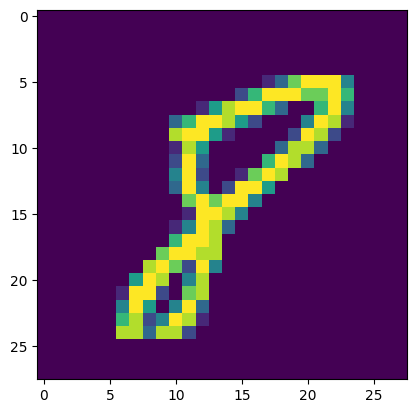

In [6]:
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

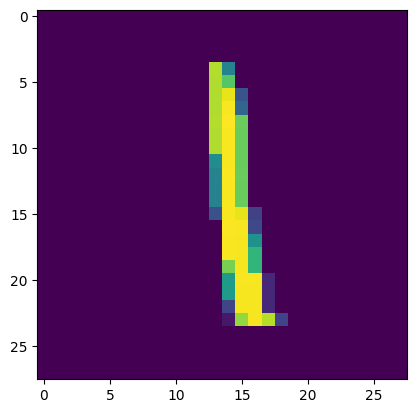

In [7]:
plt.imshow(df.iloc[39544,1:].values.reshape(28,28))

In [8]:
X = df.iloc[:,1:]
y=df.iloc[:,0]

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
X_train.shape

(33600, 784)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn=KNeighborsClassifier()

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
import time 
start= time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)

6.893195867538452


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [17]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [18]:
#PCA
from sklearn.decomposition import PCA

In [19]:
pca=PCA(n_components=100)

In [20]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [21]:
X_train_trf.shape

(33600, 100)

In [22]:
knn=KNeighborsClassifier()
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [23]:
y_pred=knn.predict(X_test_trf)

In [24]:
accuracy_score(y_test, y_pred)

0.9544047619047619

In [25]:
pca= PCA(n_components=200)
    
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)
    
knn=KNeighborsClassifier()    
knn.fit(X_train_trf, y_train)
    
y_pred=knn.predict(X_test_trf)
    
print(accuracy_score(y_test, y_pred))

0.9507142857142857


In [26]:
pca=PCA(n_components=2)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [27]:
X_train_trf

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]], shape=(33600, 2))

In [28]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig = px.scatter(
    x=X_train_trf[:, 0],
    y=X_train_trf[:, 1],
    color=y_train_trf,
    color_discrete_sequence=px.colors.qualitative.G10
)

In [29]:
fig.show()

In [30]:
#transformations in 3d
pca=PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [31]:
X_train_trf

array([[-2.71863253, -0.48982409,  1.1354966 ],
       [-0.67698015, -6.75362491, -2.33590139],
       [-3.03323281,  6.50981624,  7.49182983],
       ...,
       [ 2.14883643,  0.78079444, -0.74738774],
       [ 1.05957006,  0.94767312,  3.94973114],
       [17.70258446,  1.96188185, -4.94352837]], shape=(33600, 3))

In [32]:
print(X_train_trf.shape)  # Should print (n_samples, 3)
print(y_train_trf.shape)  # Should print (n_samples,)


(33600, 3)
(33600,)


In [33]:
y_train_trf=y_train.astype(str)
fig = px.scatter_3d(
	x=X_train_trf[:, 0],
	y=X_train_trf[:, 1],
	z=X_train_trf[:, 2],
	color=y_train_trf
)
fig.update_layout(
	margin=dict(l=20, r=20, t=20, b=20)
)

In [34]:
pca.explained_variance_
#eigen value

array([40.67111198, 29.17023401, 26.74459621])

In [35]:
pca.components_.shape

(3, 784)

In [36]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [37]:
pca=PCA(n_components=None)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [38]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [39]:
pca.components_.shape

(784, 784)

In [40]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

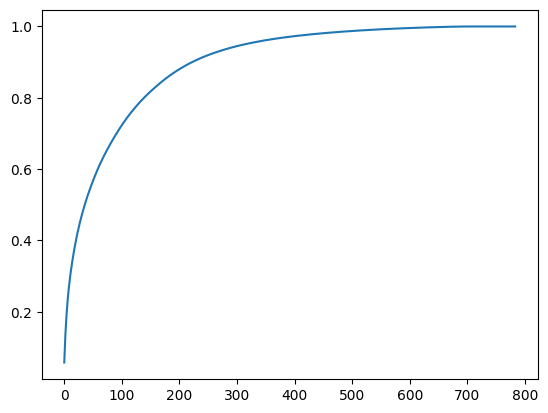

In [41]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))